In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Plotting style
sns.set_style("dark") 
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

The Concrete Compressive Strength dataset is a regression dataset obtained from the University of California, Irvine Machine Learning Repository. It gives an understanding of how
age and other quantitative measurements of ingredients used in concrete mixtures affect the
strength of the concrete, and consequently, its quality. The dataset contains 1030
instances with eight quantitative features (integer and continuous) and one quantitative (continuous) target variable. The target variable is the compressive strength of concrete, measured
in megapascals (MPa), which is predicted based on the ingredients and their respective amount
used in the mixture, as well as the age of the concrete. The eight attributes presented in the
dataset are cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and
fine aggregate, all measured in kg/m3, while the integer feature of age is measured in days.

In [2]:
# Organize the excel file in a dataframe
df = pd.read_excel("Concrete_Data.xls")

# Seperate the target variable (Concrete compressive strength) from the rest "predicting" attributes
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '], axis=1)
# Target variable
y= df['Concrete compressive strength(MPa, megapascals) '].values

N, M = X.shape

# Check for missing values across the dataset
print("Checking for missing values: \n")
print(df.isnull().sum()) 

# Clean the names of the attributes, remove everything after the first '(' in each column name
X.columns = [col.split('(')[0].strip() for col in X.columns]

print(f"\n Instances: {N}, Attributes: {M} \n") # Instances, Attributes
# Display my dataset (head is only a preview of the first 5 instances)
X.head()

Checking for missing values: 

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

 Instances: 1030, Attributes: 8 



,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [3]:
# Standard summary statistics
summary = X.describe()

# Calculate the range for every attribute
range_var = X.max() - X.min()
range_var.name = 'range'

# Append the range as a new row using pd.concat
summary1 = pd.concat([summary, range_var.to_frame().T])

# Calculate the IQR for every attribute

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
IQR.name = 'IQR'

# Append the IQR as a new row using pd.concat
summary_total = pd.concat([summary1, IQR.to_frame().T])

# Display the summary
print("\n Summary statistics table: \n")
summary_total


 Summary statistics table: 



,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000
range,438.000000,359.400000,200.100000,125.250000,32.200000,344.000000,398.600000,364.000000
IQR,157.625000,142.950000,118.270000,27.100000,10.160000,97.400000,93.050000,49.000000


# HISTOGRAMS 

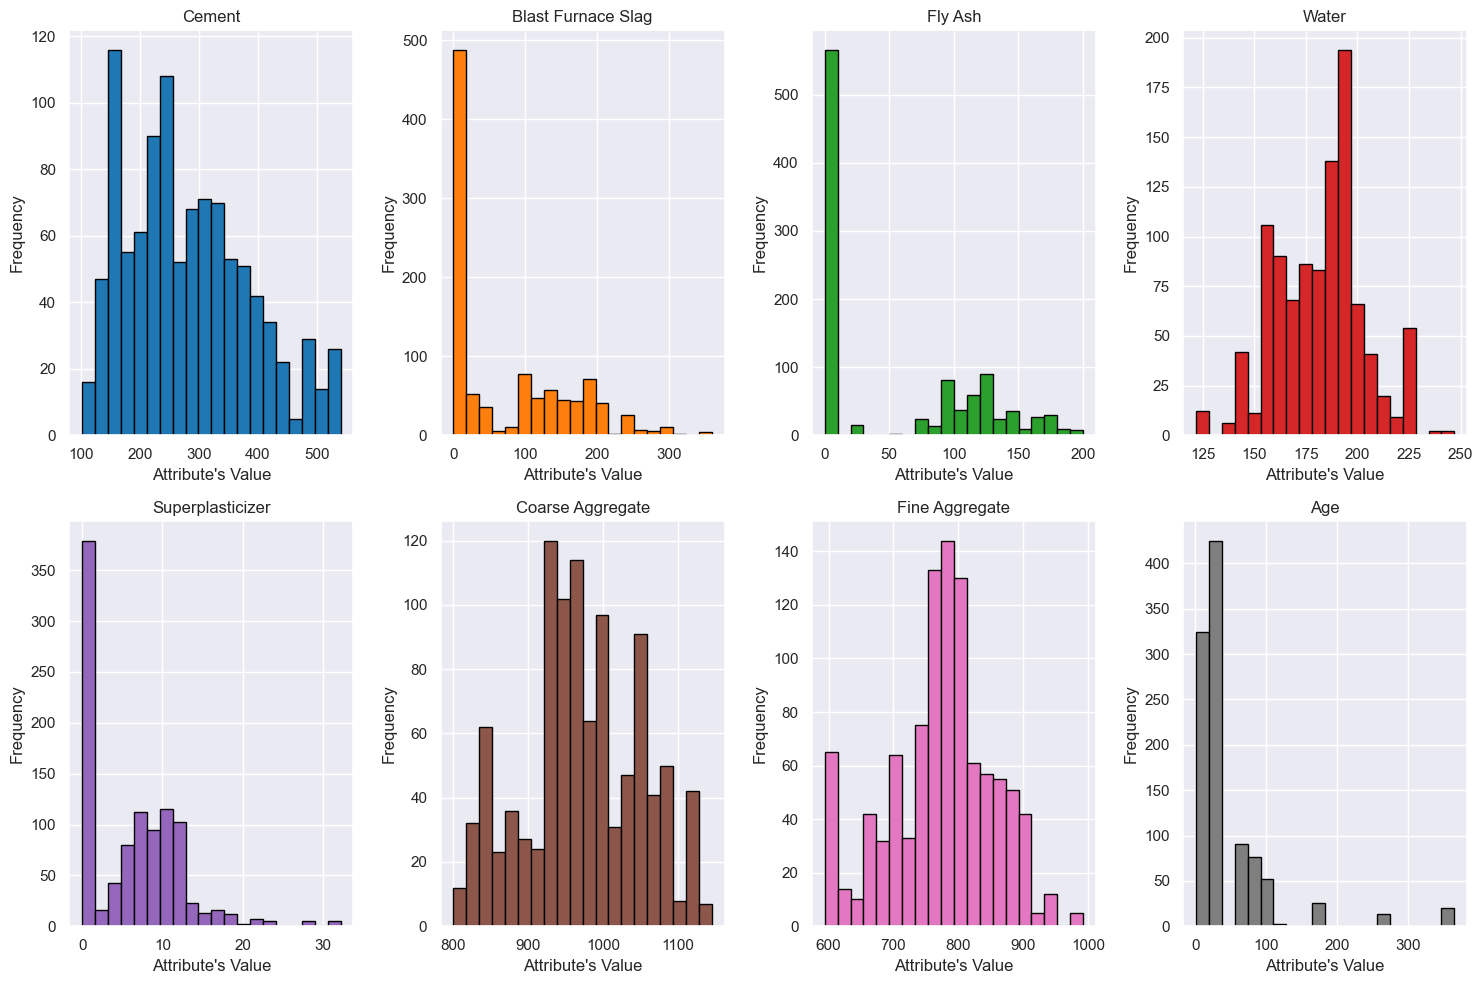

In [ ]:

# Assign each attribute to a specific color
colors = [
    "tab:blue", "tab:orange", "tab:green", "tab:red",
    "tab:purple", "tab:brown", "tab:pink", "tab:gray"
]

fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax = ax.ravel()

# Take the first 8 columns (all features)
for i in range(8):  
    ax[i].hist(X.iloc[:, i], bins=20, color=colors[i], edgecolor="black")
    ax[i].set_title(X.columns[i])
    ax[i].set_xlabel("Attribute's Value")
    ax[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

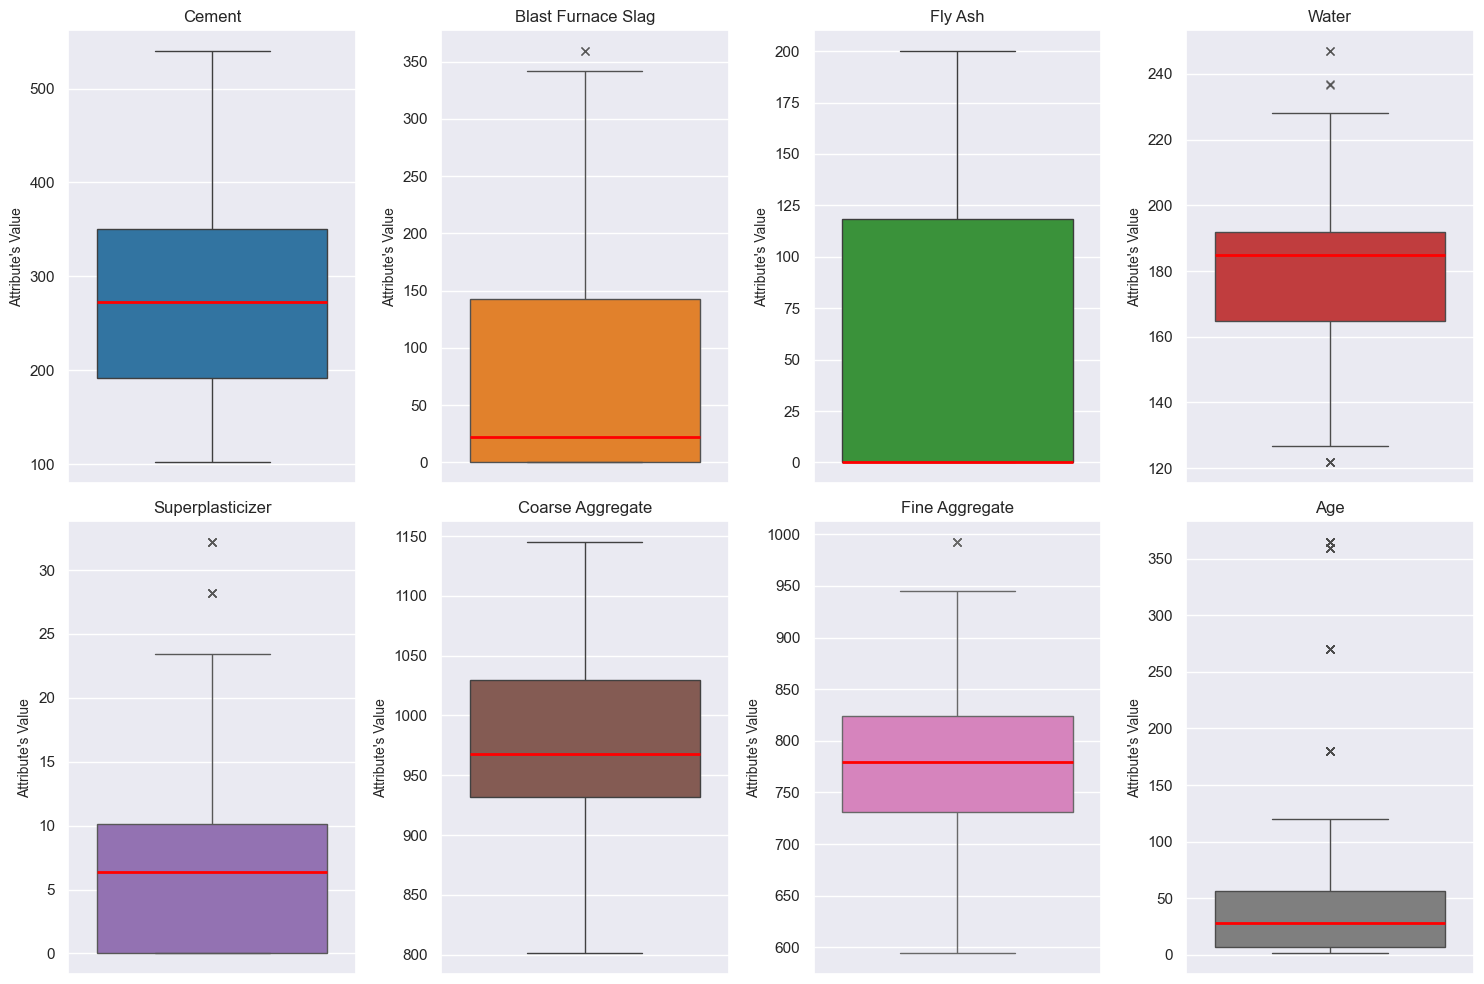

In [6]:
# # # BOXPLOTS # # #

fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax = ax.ravel()

# Take the first 8 columns/features
for i in range(8):  
    sns.boxplot(
        y=X.iloc[:, i],
        ax=ax[i],
        color=colors[i],
    medianprops=dict(color="red", linewidth=2), # Median line is set to red color
    flierprops=dict(marker="x", color="black", alpha=0.8)  # Outliers  
    )
    ax[i].set_title(X.columns[i], fontsize=12)
    ax[i].set_xlabel("")  
    ax[i].set_ylabel("Attribute's Value", fontsize=10)

plt.tight_layout()
plt.show()

# correlation matrix

The correlation matrix provides a detailed mathematical representation of the
relationships between all attributes. Values range from -1 (perfect negative correlation) to +1
(perfect positive correlation), with 0 indicating no linear relationship. Constructing a correlation matrix is a crucial step in preprocessing data analysis, as it highlights the most influential
attributes and their potential impact on the output variable.

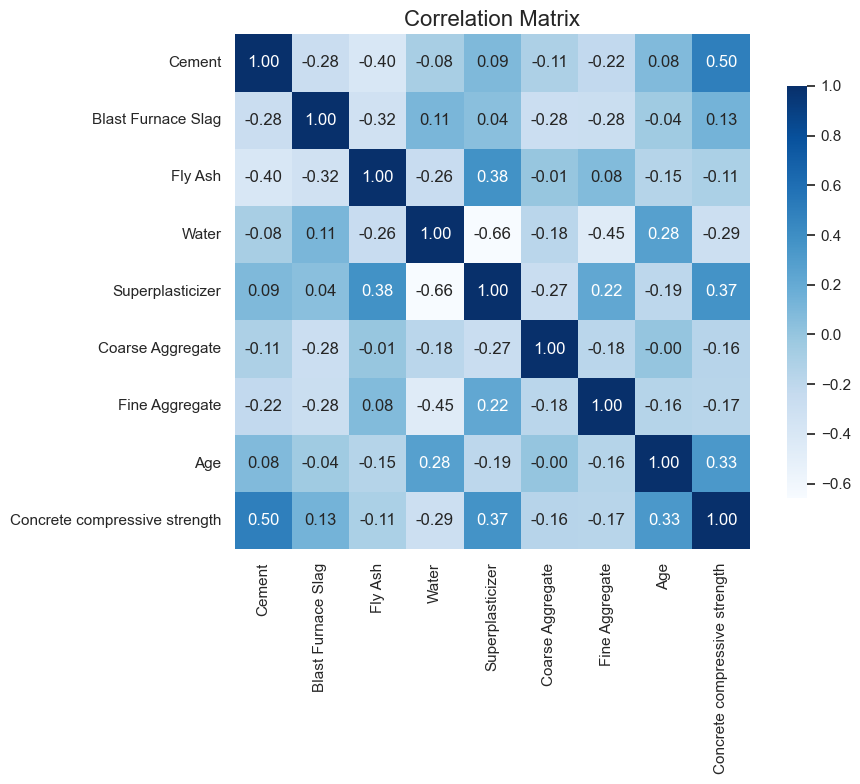

In [ ]:
# Clean the names of the dataframe, remove everything after the first '(' in each column name
df.columns = [col.split('(')[0].strip() for col in df.columns]
corr_matrix = df.corr(numeric_only=True)  # Ignore non-numeric columns if there are any
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()

In [11]:
# Keep only one triangle from the corr_matrix (k=1 removes diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten, drop NaNs, sort by absolute value (so strong negative also ranks high)
top_pairs = (upper.stack().sort_values(key=lambda s: s.abs(), ascending=False))

# Print top 10 pairs
print("\n Stronger correlations among attributes (top 10 pairs): \n")
print(top_pairs.head(10))  


 Stronger correlations among attributes (top 10 pairs): 

Water               Superplasticizer                -0.657464
Cement              Concrete compressive strength    0.497833
Water               Fine Aggregate                  -0.450635
Cement              Fly Ash                         -0.397475
Fly Ash             Superplasticizer                 0.377340
Superplasticizer    Concrete compressive strength    0.366102
Age                 Concrete compressive strength    0.328877
Blast Furnace Slag  Fly Ash                         -0.323569
Water               Concrete compressive strength   -0.289613
Blast Furnace Slag  Coarse Aggregate                -0.283998
dtype: float64


# PCA

Standardization is required in order to place all features on a comparable scale, especially
when datasets contain attributes that vary in scale and units. Additionally, standardization
ensures that all features contribute equally to the model, preventing those with larger numerical
ranges from dominating and therefore affecting the learning process unfairly. Many machine
learning algorithms, including PCA, are sensitive to feature scaling. PCA would capture variance
from features with larger absolute values like cement and consequently add a bias factor in the
analysis. Standardizing all features prevents this issue and allows PCA to identify directions that
reflect the true underlying structure of the data

In [ ]:
# Save the attributes' names
attributes = X.columns.tolist()

# Standardize features
scaler = StandardScaler()
X_standard = scaler.fit_transform(X) 
pca = PCA(n_components=X.shape[1], random_state=0)
Z = pca.fit_transform(X_standard)  

# Loadings: how each original feature contributes to each PC
loadings = pd.DataFrame(pca.components_, columns=attributes, index=[f"PC{i+1}" for i in range(pca.n_components_)] ).T  # Transpose to show rows as attributes
print("\n PCA loadings (feature contributions to each PC, absolute values): \n")
print(loadings.round(3))
#print(loadings.round(3).abs())


 PCA loadings (feature contributions to each PC, absolute values): 

                      PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
Cement              0.098 -0.112  0.814  0.054 -0.148 -0.203 -0.222  0.446
Blast Furnace Slag  0.177  0.686 -0.173  0.363  0.021  0.305 -0.228  0.437
Fly Ash            -0.395 -0.144 -0.408 -0.227 -0.550 -0.183 -0.352  0.382
Water               0.547  0.053 -0.213 -0.296 -0.070 -0.366  0.524  0.389
Superplasticizer   -0.506  0.284  0.234  0.037 -0.354  0.193  0.665  0.052
Coarse Aggregate    0.038 -0.630 -0.173  0.546  0.033  0.315  0.227  0.349
Fine Aggregate     -0.402 -0.020 -0.005 -0.386  0.701  0.092  0.039  0.433
Age                 0.292 -0.126  0.101 -0.528 -0.228  0.744 -0.069  0.013


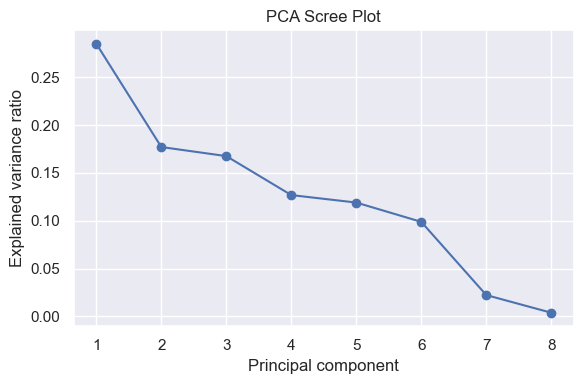


 Explained variance ratio per PC: [0.285 0.177 0.168 0.127 0.119 0.099 0.022 0.004]


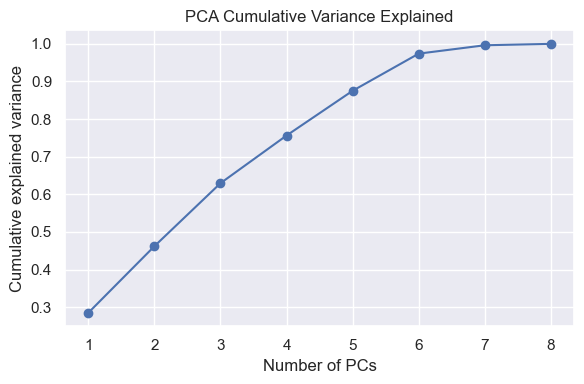


 Cumulative explained variance: [0.285 0.462 0.63  0.756 0.875 0.974 0.996 1.   ]


In [13]:
evr = pca.explained_variance_ratio_
cum_evr = np.cumsum(evr)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(evr)+1), evr, marker='o')
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n Explained variance ratio per PC:", np.round(evr, 3))

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_evr)+1), cum_evr, marker='o')
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Cumulative Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n Cumulative explained variance:", np.round(cum_evr, 3))

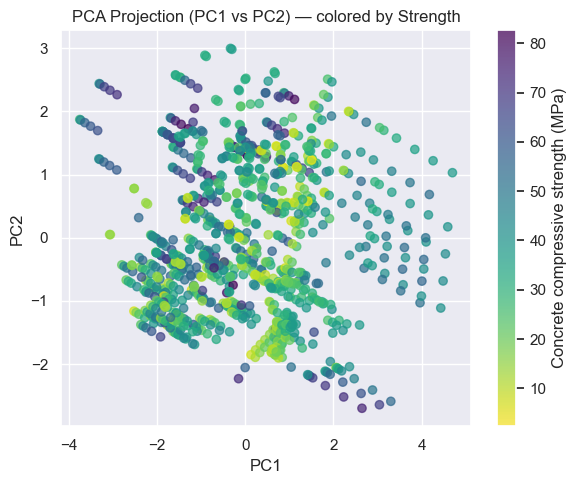

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

In [14]:
plt.figure(figsize=(6,5))
sc = plt.scatter(Z[:,0], Z[:,1], c=y, cmap="viridis_r", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2) — colored by Strength")
cbar = plt.colorbar(sc)
cbar.set_label("Concrete compressive strength (MPa)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(7,6))

C:\Users\chris\AppData\Local\Temp\ipykernel_19248\3723337220.py:8: UserWarning: Adding colorbar to a different Figure <Figure size 600x500 with 3 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(sc); cbar.set_label("Concrete compressive strength (MPa)")


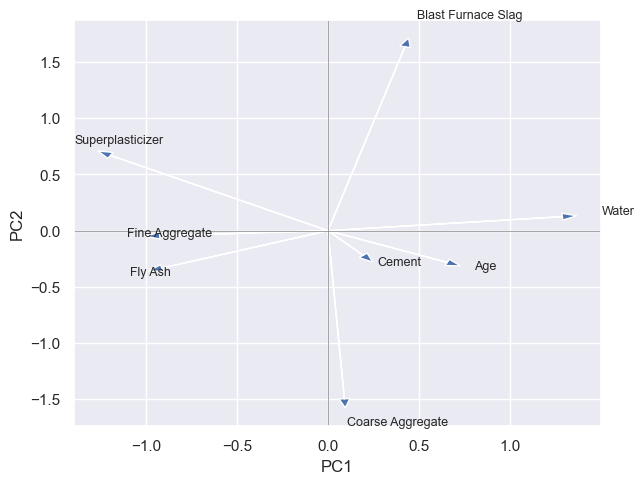

In [15]:
arrow_scale = 2.5 # Scale arrows
for i, feat in enumerate(attributes):
    plt.arrow(0, 0, pca.components_[0, i]*arrow_scale, pca.components_[1, i]*arrow_scale,
              head_width=0.06, head_length=0.08, length_includes_head=True)
    plt.text(pca.components_[0, i]*arrow_scale*1.1,
             pca.components_[1, i]*arrow_scale*1.1, feat, fontsize=9)

cbar = plt.colorbar(sc); cbar.set_label("Concrete compressive strength (MPa)")
plt.axhline(0, color='grey', lw=0.5); plt.axvline(0, color='grey', lw=0.5)
plt.tight_layout()
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()